In [1]:
from preprocessors.open_read_check import loader
from preprocessors.check_missing import check_missing
from preprocessors.imputation_module import knn_imputer, median_imputer
from preprocessors.save_dataset import save_dataframe

import seaborn as sns
import numpy as np

# Working with missing values
---

### Loading dataset after first stage of preprocessing

In [2]:
df = loader(dir_one="data", dir_two="processed", file_name="AirQualityUCI_stage_one.csv")
df.head(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime,Hour
0,2004-03-10,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00,18
1,2004-03-10,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00,19
2,2004-03-10,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00,20
3,2004-03-10,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00,21
4,2004-03-10,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00,22


### Let`s check quantity of missing values in columns

In [3]:
check_missing(df)

,Missing Count,Missing %
NMHC(GT),8412,90.20
CO(GT),1652,17.71
NO2(GT),1611,17.27
NOx(GT),1608,17.24
PT08.S1(CO),335,3.59
PT08.S2(NMHC),335,3.59
C6H6(GT),335,3.59
PT08.S3(NOx),335,3.59
PT08.S4(NO2),335,3.59
PT08.S5(O3),335,3.59


## Missing Data Analysis by Sensor Parameter

---
<br>

### 1. Air Quality Parameters

- **`NMHC(GT)`**
<br>**Parameter:** Non-methane Hydrocarbons concentration (µg/m³)
<br>**Description:** This column represents the concentration of non-methane hydrocarbons in micrograms per cubic meter. It is a key indicator of urban air pollution and is important for assessing overall air quality.
<br>**Missing Values:** 90.2% missing
<br>**Assessment:** The sensor appears to have been largely non-functional during the measurement period. With over 90% of data missing, the column has limited statistical usability in its current state.
<br>**Recommendation:** The column should be removed from the dataset for modeling purposes. For exploratory data analysis, it may be retained if there is a specific interest in partial patterns. Alternatively, an attempt can be made to reconstruct the missing values using the associated sensor PT08.S2(NMHC).
<br>
<br>
- **`CO(GT)`**
<br>**Parameter:** Carbon Monoxide concentration (mg/m³)
<br>**Description:** Represents the concentration of carbon monoxide, a toxic gas, in the air. It is a crucial pollutant measured in urban environments and highly relevant for air quality modeling.
<br>**Missing Values:** 17.71% missing
<br>**Assessment:** The missing portion is non-trivial but manageable.
<br>**Recommendation:** Impute missing values using the median, as the distribution may be skewed. More advanced methods (e.g., regression or KNN imputation) may be explored depending on modeling needs.
<br>
<br>
- **`NO2(GT)`**
<br>**Parameter:** Nitrogen Dioxide concentration (µg/m³)
<br>**Description:** A reactive and toxic pollutant, nitrogen dioxide is typically produced by vehicle emissions and industrial processes. It is a vital variable for health-related air quality studies.
<br>**Missing Values:** 17.27% missing
<br>**Assessment:** Approximately one-fifth of the values are missing.
<br>**Recommendation:** Impute using median values. Regression-based methods leveraging correlated features may also be considered.
<br>
<br>
- **`NOx(GT)`**
<br>**Parameter:** Total Nitrogen Oxides concentration (µg/m³)
<br>**Description:** Represents the total concentration of NO and NO₂ combined. It is directly associated with combustion processes and urban pollution.
<br>**Missing Values:** 17.24% missing
<br>**Assessment:** Missing values are consistent with other chemical gas sensors.
<br>**Recommendation:** Use median imputation or predictive modeling using other gas measurements as input.
<br>
<br>
- **`C6H6(GT)`**
<br>**Parameter:** Benzene concentration (µg/m³)
<br>**Description:** A carcinogenic air pollutant, critical for environmental and health studies.
<br>**Missing Values:** 3.59% missing
<br>**Assessment:** Low proportion of missing values.
<br>**Recommendation:** Impute using the median. Retain the feature for further analysis.
<br>
<br>
### 2. Raw Sensor Outputs

- **`PT08.S1(CO)`**
<br>**Parameter:** Raw sensor output from the CO electrochemical sensor
<br>**Description:** This is the uncalibrated signal from the CO sensor, typically recorded in ADC units. Though not interpretable in standard units, it can be useful for feature engineering or internal calibration.
<br>**Missing Values:** 3.59% missing
<br>**Assessment:** Minimal and uniform across similar sensors.
<br>**Recommendation:** Impute using the median. These values are useful for modeling, especially if GT values are not available.
<br>
<br>
- **`PT08.S2(NMHC)`**
<br>**Parameter:** Raw sensor output for NMHC
<br>**Description:** Sensor output associated with non-methane hydrocarbons. Can be leveraged to approximate missing NMHC(GT) values.
<br>**Missing Values:** 3.59% missing
<br>**Assessment:** Sensor provides useful raw signals.
<br>**Recommendation:** Impute missing values using median. Consider using this variable to reconstruct NMHC(GT).
<br>
<br>
- **`PT08.S3(NOx)`**
<br>**Parameter:** Raw sensor output for NOx
<br>**Description:** Signal output from MOX-based sensor for nitrogen oxides. Not in physical units but indicative of concentration levels.
<br>**Missing Values:** 3.59% missing
<br>**Assessment:** Minimal loss.
<br>**Recommendation:** Median imputation is sufficient.
<br>
<br>
- **`PT08.S4(NO2)`**
<br>**Parameter:** Raw sensor output for NO2
<br>**Description:** Raw sensor output related to NO2 concentration. Useful for inferring missing NO2(GT) values.
<br>**Missing Values:** 3.59% missing
<br>**Assessment:** Low missing rate.
<br>**Recommendation:** Impute with median or model-based approaches if needed.
<br>
<br>
- **`PT08.S5(O3)`**
<br>**Parameter:** Raw sensor output for Ozone
<br>**Description:** Output from the sensor potentially related to ozone levels.
<br>**Missing Values:** 3.59% missing
<br>**Assessment:** Small proportion missing.
<br>**Recommendation:** Use median imputation.
<br>
<br>
### 3. Meteorological Parameters

- **`T`**
<br>**Parameter:** Ambient Temperature (°C)
<br>**Description:** Recorded temperature. Temperature variations are critical for interpreting chemical processes and sensor behavior.
<br>**Missing Values:** 3.59% missing
<br>**Assessment:** The distribution is expected to be cyclical and seasonal.
<br>**Recommendation:** Imputation with median is acceptable for general use. Seasonal interpolation may be considered for more accurate modeling.
<br>
<br>
- **`RH`**
<br>**Parameter:** Relative Humidity (%)
<br>**Description:** Percentage of humidity in the air. Important for chemical reaction dynamics and gas sensor responses.
<br>**Missing Values:** 3.59% missing
<br>**Assessment:** Relatively low.
<br>**Recommendation:** Impute with median.
<br>
<br>
- **`AH`**
<br>**Parameter:** Absolute Humidity (g/m³)
<br>**Description:** Represents the total mass of water vapor per unit volume of air. It can be derived from temperature and relative humidity.
<br>**Missing Values:** 3.59% missing
<br>**Assessment:** Values may be redundant as they can be derived from T and RH.
<br>**Recommendation:** Either impute using the median or re-calculate using the appropriate physical formula.


## Feature Analysis for Modeling `C6H6(GT)`
---
According our goal, inference of C6H6(GT) value as depend parameter, we need to choose all independent parameters. It will be useful for choosing parameters of missing imputation. For example, we can use strong method of missing imputation for NMHC, based on training model on PT08.S2(NMHC) (both of this parameters have linear correlation). But it isn`t necessary: C6H6(GT) and PT08.S2(NMHC) have ctrong correlation. We need to drop PT08.S2(NMHC) from our training dataset, so we need to drop NMHC data too.

### Air Quality Indicators

- **CO(GT)**
  Strongly correlated due to shared source (e.g., combustion).
  Include

- **NO2(GT)**
  Indicative of traffic-related pollution.
  Include

- **NOx(GT)**
  Represents total nitrogen oxides; relevant for urban air pollution.
  Include

- **NMHC(GT)**
  90% missing values. Closely related to PT08.S2(NMHC).
  Drop

- **C6H6(GT)**
  Target variable (benzene concentration).
  Do not include as feature


### Raw Sensor Outputs

- **PT08.S1(CO)**
  Sensor signal related to CO — potentially informative.
  Include

- **PT08.S2(NMHC)**
  Closely related to C6H6(GT) — redundant.
  Drop

- **PT08.S3(NOx)**
  Sensor signal for NOx — useful indirect measure.
  Include

- **PT08.S4(NO2)**
  Reflects NO2 sensor readings.
  Include

- **PT08.S5(O3)**
  May capture background ozone levels.
  Include (test impact)


### Meteorological Variables

- **T** (Temperature)
  Influences gas behavior and emission patterns.
  Include

- **RH** (Relative Humidity)
  Affects atmospheric chemistry and sensor accuracy.
  Include

- **AH** (Absolute Humidity)
  Derivable from T and RH; potentially redundant.
  Optional


## Strategy for Handling Missing Values

---

### Drop Completely

- **NMHC(GT)** — 90.2% missing values and a strong linear dependency with the target variable `C6H6(GT)`.
- **PT08.S2(NMHC)** — Raw sensor data associated with `NMHC(GT)`; removed due to the removal of the main parameter.

### KNN Imputation (High missing ratio ~17%)

- **CO(GT)**
- **NO2(GT)**
- **NOx(GT)**

These features have significant missing rates and are influenced by multiple correlated factors such as weather and other pollutants. KNN imputation is appropriate for preserving multivariate relationships.

### Median Imputation (Low missing ratio ~3.59%)

- **PT08.S1(CO)**
- **C6H6(GT)**
- **PT08.S3(NOx)**
- **PT08.S4(NO2)**
- **PT08.S5(O3)**
- **T**
- **RH**
- **AH**

For these features, median imputation is efficient and sufficient given the low proportion of missing data and relatively stable distributions.


### List of columns to drop and list of columns of missing imputation

In [4]:
knn_columns = ['CO(GT)', 'NO2(GT)', 'NOx(GT)']
median_columns = [
    'PT08.S1(CO)', 'C6H6(GT)',
    'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
    'T', 'RH', 'AH'
]

### Making copy of main dataframe and realising imputation by two different methods

In [5]:
df_impt = df.copy()

df_impt = df_impt.drop(['NMHC(GT)', 'PT08.S2(NMHC)'], axis=1)

df_impt = knn_imputer(df_impt, knn_columns)
df_impt = median_imputer(df_impt, median_columns)


### Let`s check dataframe after fixing all missing values

In [6]:

df_impt.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour
count,9326.000000,9326.000000,9326.000000,9326.000000,9326.000000,9326.000000,9326.000000,9326.000000,9326.000000,9326.000000,9326.000000,9326.000000
mean,2.115758,1098.510079,10.015462,242.243084,834.434163,111.838649,1456.506541,1020.754235,18.299228,49.247341,1.024448,11.505576
std,1.340886,213.255277,7.323169,196.465150,252.221787,45.045294,339.933498,391.419866,8.672554,17.003130,0.396532,6.920980
min,0.100000,647.000000,0.100000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700,0.000000
25%,1.180000,941.000000,4.600000,106.400000,665.000000,81.000000,1241.000000,741.000000,12.000000,36.500000,0.745500,6.000000
50%,2.000000,1063.000000,8.200000,206.000000,806.000000,113.091251,1463.000000,963.000000,17.800000,49.600000,0.995400,12.000000
75%,2.600000,1222.000000,13.700000,288.000000,961.000000,134.000000,1662.750000,1257.000000,24.100000,61.900000,1.298625,18.000000
max,11.900000,2040.000000,63.700000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,23.000000


In [7]:
save_dataframe(df_impt, path='data/processed', filename='AirQualityUCI_missing_impt.csv')

Dataset saved to: data/processed\AirQualityUCI_missing_impt.csv


### There are no missing values

In [8]:
check_missing(df_impt)

,Missing Count,Missing %


### Let`s check distributions after that

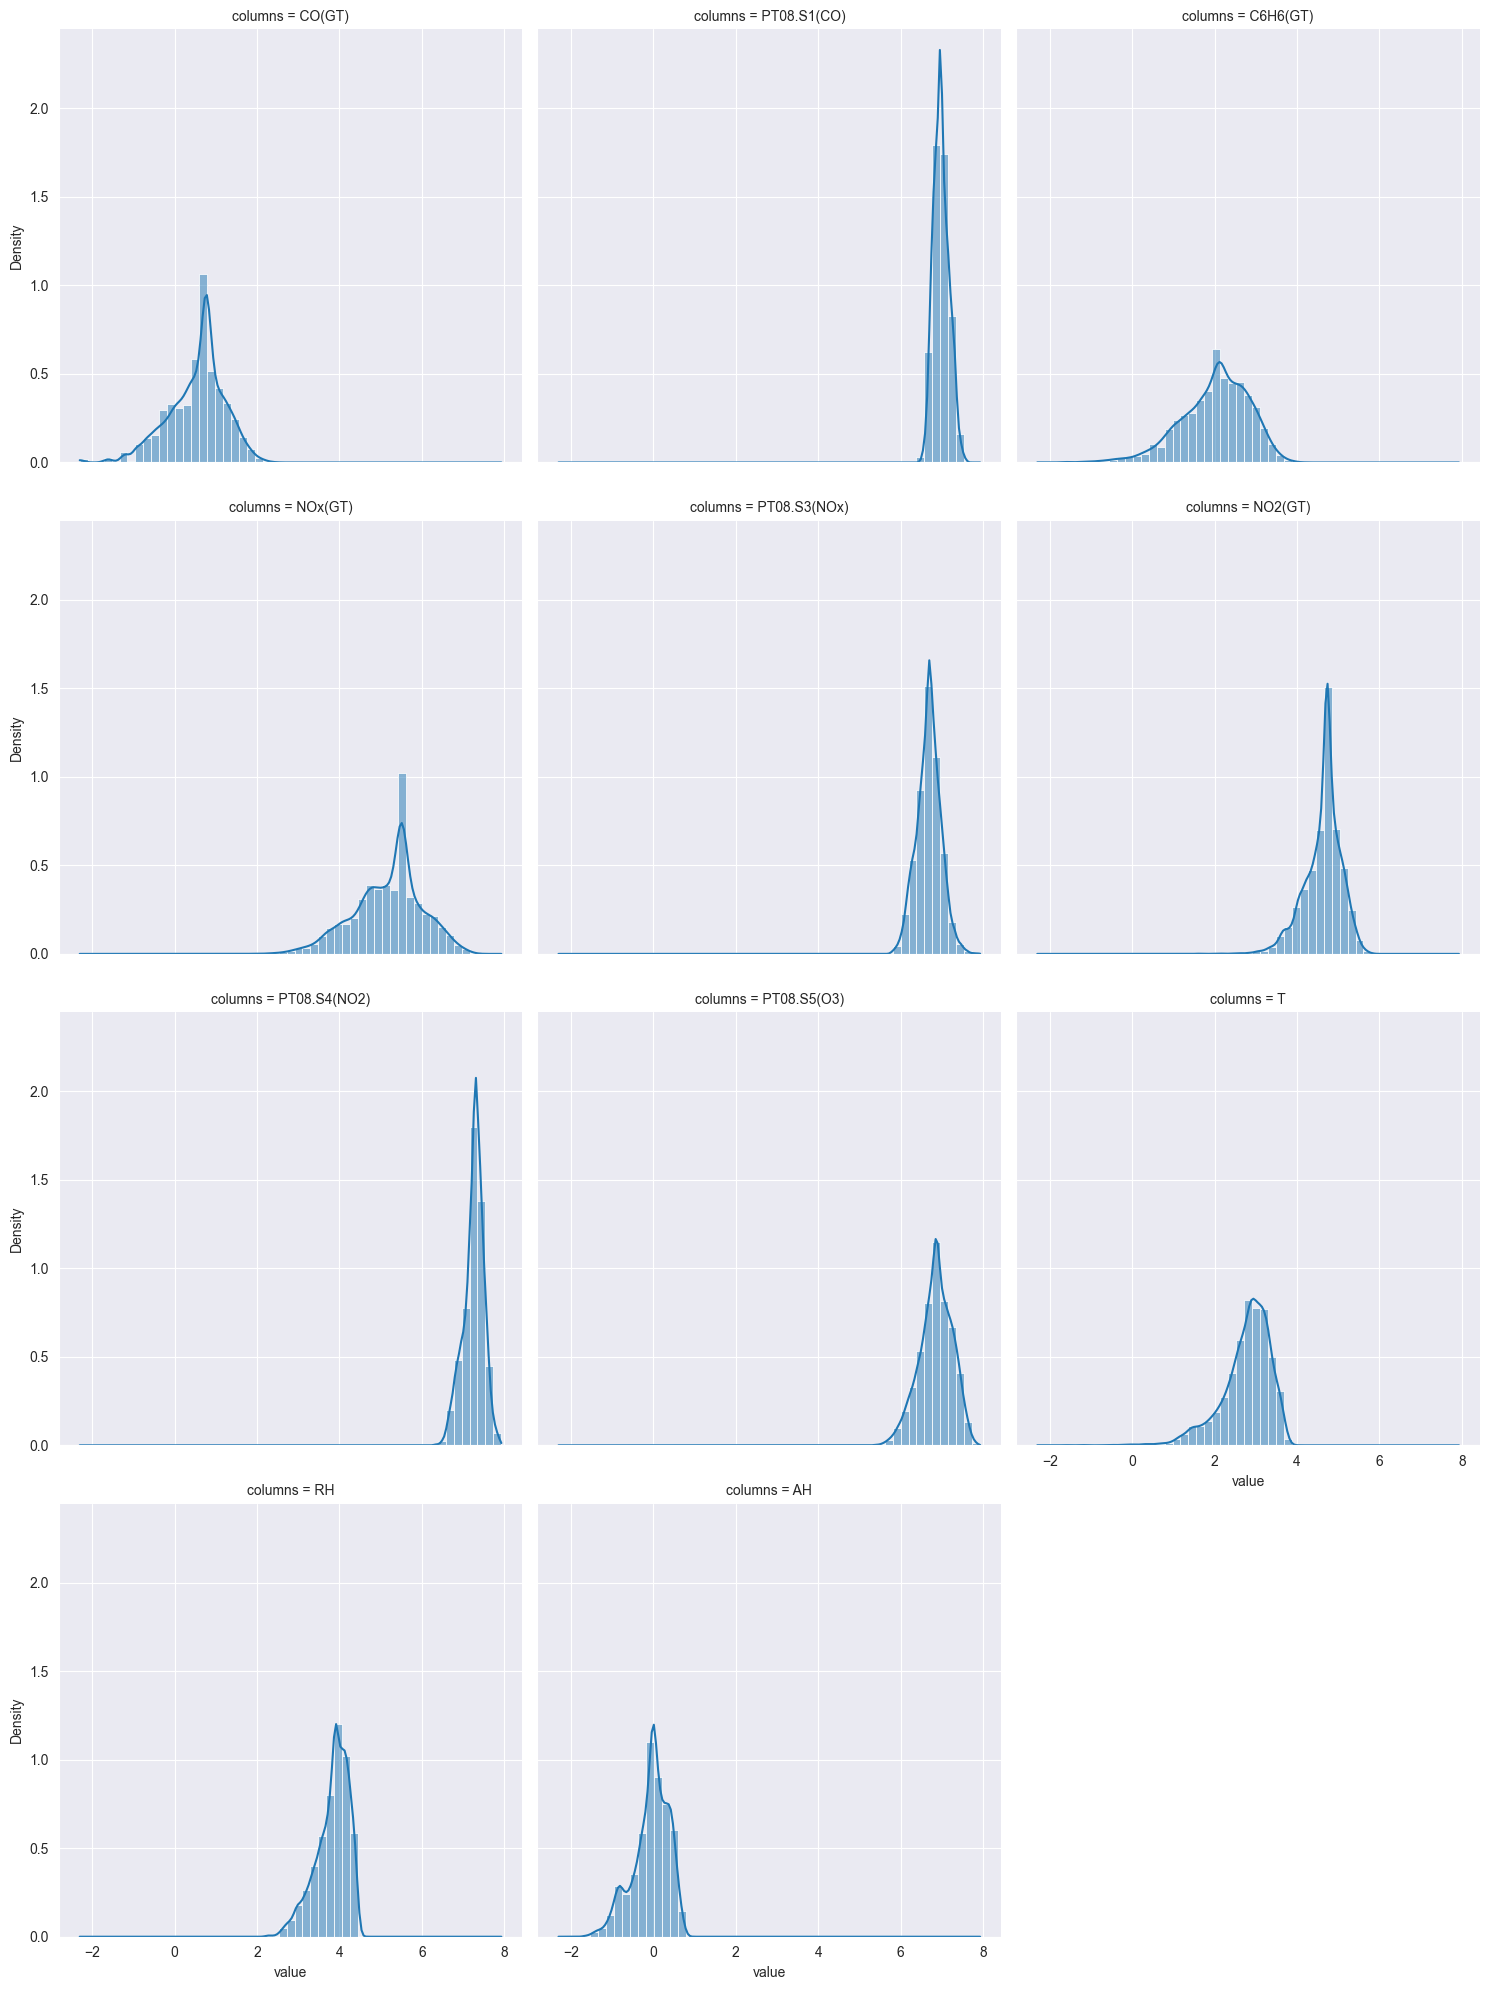

In [9]:
df_log_input = df_impt.iloc[:, 2:13].copy()
df_log_input[df_log_input <= 0] = np.nan
dfm = np.log(df_log_input).melt(var_name='columns')
g = sns.displot(data=dfm, x='value', col='columns', col_wrap=3, common_norm=False, kde=True, stat='density')

### Let`s check main statistics after missing imputation

In [10]:
df_impt.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour
count,9326.000000,9326.000000,9326.000000,9326.000000,9326.000000,9326.000000,9326.000000,9326.000000,9326.000000,9326.000000,9326.000000,9326.000000
mean,2.115758,1098.510079,10.015462,242.243084,834.434163,111.838649,1456.506541,1020.754235,18.299228,49.247341,1.024448,11.505576
std,1.340886,213.255277,7.323169,196.465150,252.221787,45.045294,339.933498,391.419866,8.672554,17.003130,0.396532,6.920980
min,0.100000,647.000000,0.100000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700,0.000000
25%,1.180000,941.000000,4.600000,106.400000,665.000000,81.000000,1241.000000,741.000000,12.000000,36.500000,0.745500,6.000000
50%,2.000000,1063.000000,8.200000,206.000000,806.000000,113.091251,1463.000000,963.000000,17.800000,49.600000,0.995400,12.000000
75%,2.600000,1222.000000,13.700000,288.000000,961.000000,134.000000,1662.750000,1257.000000,24.100000,61.900000,1.298625,18.000000
max,11.900000,2040.000000,63.700000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,23.000000
